#### Large RAM is required to load the larger models. Running on GPU can optimize inference speed.

In [1]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess

#### Load an example image

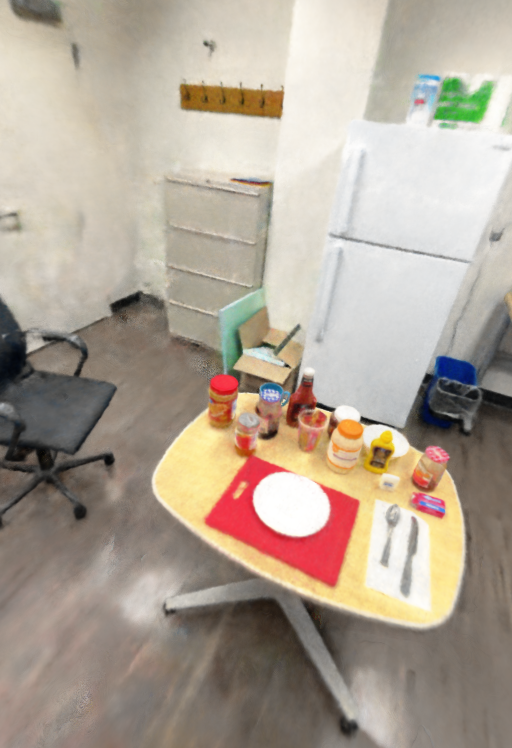

In [5]:
raw_image = Image.open("/workspace/chat-with-nerf/session_output/ee533b10-40c7-4cd4-b8b2-b2be213785ae/images/rgb/rgb5_2023-05-16_19-57-20.png").convert('RGB')   
# display(raw_image.resize((596, 437)))
display(raw_image)

In [6]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

#### Load pretrained/finetuned BLIP2 captioning model

In [7]:
# we associate a model with its preprocessors to make it easier for inference.
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_flant5xxl", is_eval=True, device=device
# )

# Other available models:
# 
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
# )
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
)
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
# )

vis_processors.keys()

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

dict_keys(['train', 'eval'])

#### prepare the image as model input using the associated processors

In [8]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [9]:
model.generate({"image": image})

['a room with a table, chairs and a refrigerator']

#### generate multiple captions using nucleus sampling

In [10]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a room with a table, chairs and a refrigerator',
 'a room with a table, chairs and a refrigerator',
 'a room with a table, chairs and a refrigerator']

#### instructed zero-shot vision-to-language generation

In [14]:
model.generate({"image": image, "prompt": "Question: Describe the table in detail using sentences. Answer:"})

['The table is in a room with a chair and a refrigerator']

In [30]:
model.generate({"image": image, "prompt": "Question: Describe the shape and material of the book, if there is one. Answer:"})

['it is a hardcover book']

In [ ]:
context = [
    ("which city is this?", "singapore"),
    ("why?", "it has a statue of a merlion"),
]
question = "where is the name merlion coming from?"
template = "Question: {} Answer: {}."

prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"

print(prompt)

Question: which city is this? Answer: singapore. Question: why? Answer: it has a statue of a merlion. Question: where is the name merlion coming from? Answer:


In [ ]:
model.generate(
    {
    "image": image,
    "prompt": prompt
    },
    use_nucleus_sampling=False,
)

['merlion is a portmanteau of mermaid and lion']